## Which type of renewable has the highest growth rate?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset

df = pd.read_csv('Global_Energy_Consumption_Renewable_Generation/renewablePowerGeneration97-17.csv')
df.head()

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
0,1990,2191.67,3.88,0.09,36.42
1,1991,2268.63,4.19,0.10,37.39
2,1992,2267.16,4.63,0.12,39.30
3,1993,2397.67,5.61,0.15,40.23
4,1994,2419.73,7.31,0.17,41.05


In [4]:
# separate each renewable type into their own dataframe

df_hydro = df[['Year', 'Hydro(TWh)']].copy()
df_bio = df[['Year', 'Biofuel(TWh)']].copy()
df_solar = df[['Year', 'Solar PV (TWh)']].copy()
df_geo = df[['Year', 'Geothermal (TWh)']].copy()

In [5]:
# calculate the percentage change yearly for each renewable type
        
def annualGrowth (lst):
    # initialise 4 empty data frames into a list
    a = pd.DataFrame()
    new_df_lst = [a]*4
    
    col_name = ['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']
    
    # calaculate perceantage change (pct) year to year for each renewable type
    for i in range(len(lst)):
        new_df_lst[i] = lst[i][col_name[i]].pct_change()
        new_df_lst[i] *= 100
        
    return new_df_lst[0], new_df_lst[1], new_df_lst[2], new_df_lst[3]
        

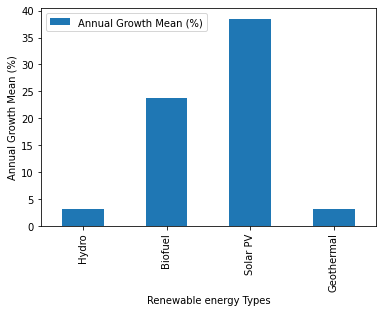

In [6]:
# store each df in a list
lst = [df_hydro, df_bio, df_solar, df_geo]

# compute annual growth rate for each renewable
ag_hydro, ag_bio, ag_solar, ag_geo = annualGrowth(lst)

# calculate the mean of annual growth
ag_hydro_mean = ag_hydro.mean()
ag_bio_mean = ag_bio.mean()
ag_solar_mean = ag_solar.mean()
ag_geo_mean = ag_geo.mean()

# transform data into a dataframe
data = {'Renewable energy Types': ['Hydro', 'Biofuel', 'Solar PV', 'Geothermal'],
        'Annual Growth Mean (%)': [ag_hydro_mean, ag_bio_mean, ag_solar_mean, ag_geo_mean]}
df_ag_mean = pd.DataFrame(data)

# plot the data in the dataframe using bar chart
df_ag_mean.plot(kind = 'bar', x='Renewable energy Types', y = 'Annual Growth Mean (%)')
plt.ylabel('Annual Growth Mean (%)')
plt.show()